We use kagglehub to programmatically download the dataset, ensuring reproducibility and avoiding manual file handling.

In [104]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\abhis\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [105]:
import kagglehub
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

pd.set_option("display.max_columns", None)

In [106]:
import os

# Find CSV file
files = os.listdir(path)
files


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [107]:
# Load CSV
df = pd.read_csv(os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv"))


In [108]:
df.shape


(7043, 21)

In [109]:
df.head(20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [110]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset contains 7,043 customers

Target variable: Churn

Mix of categorical and numerical features

TotalCharges is incorrectly typed as object

In [111]:
df.duplicated().sum()


np.int64(0)

In [112]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [114]:
df[df["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [115]:
cols_to_convert = ["TotalCharges", "MonthlyCharges","tenure"]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [116]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [117]:
df = df.dropna(subset=["TotalCharges"])

Missing values are < 1%

Caused by new customers with zero tenure

Dropping avoids noisy imputation

In [118]:
df = df.drop(columns=["customerID"])

CustomerID is a unique identifier with no predictive value

In [119]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


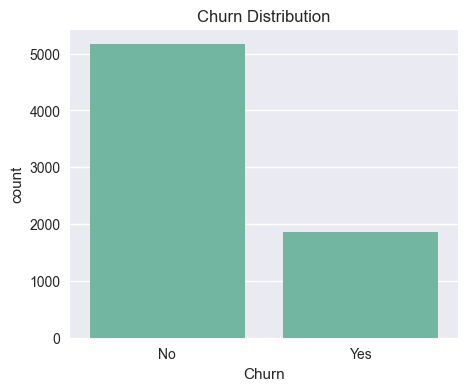

In [120]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [121]:
df["Churn"].value_counts(normalize=True) * 100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

~26% customers churned

Moderate class imbalance

<h2>Tenure Distribution</h2>

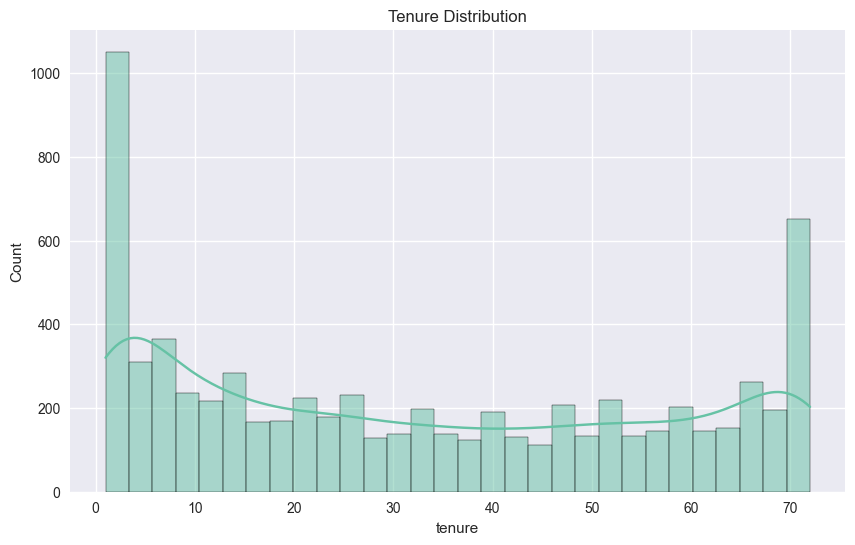

In [122]:
plt.figure(figsize=(10,6))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()

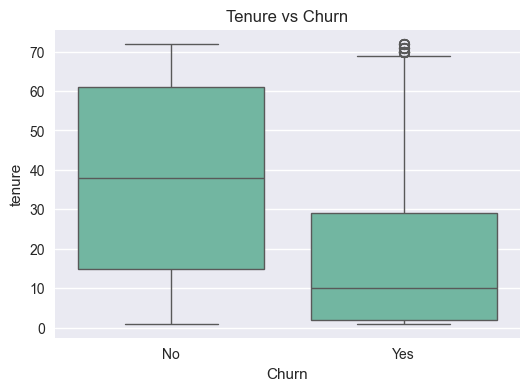

In [123]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

Churned customers have significantly lower tenure

Early-stage customers are highest churn risk

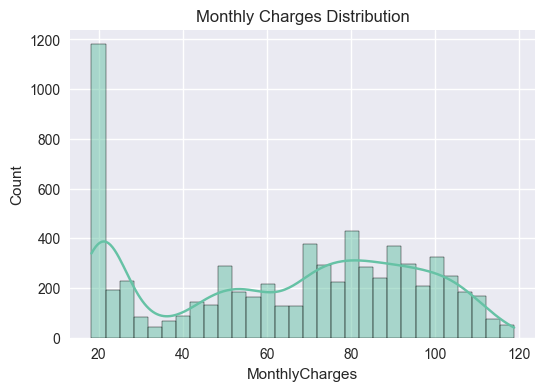

In [124]:
plt.figure(figsize=(6,4))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


<h2> Monthly Charges </h2>

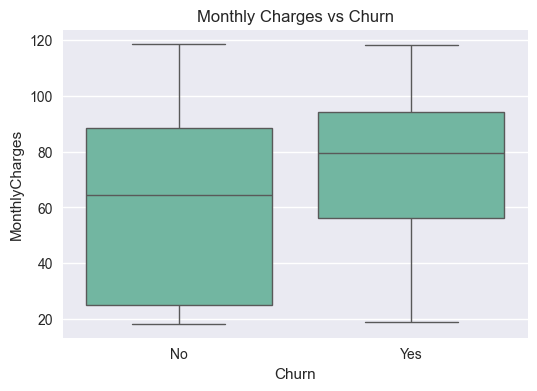

In [125]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Higher monthly charges → higher churn

Indicates price sensitivity

<h2> Total Charges </h2>

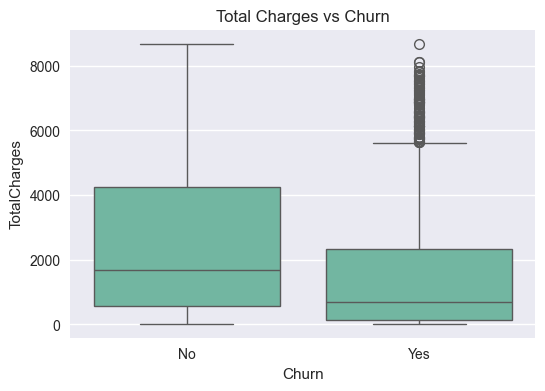

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.show()

High TotalCharges mostly belong to loyal customers

Strongly correlated with tenure

Possible multicollinearity

<h2> Outlier Handling </h2>

<h3> Outlier Detection </h3>

In [127]:
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR


In [128]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    lower, upper = iqr_bounds(df[col])
    print(col, "outliers:", ((df[col] < lower) | (df[col] > upper)).sum())


tenure outliers: 0
MonthlyCharges outliers: 0
TotalCharges outliers: 0


An IQR-based outlier analysis was performed on numerical features (tenure, MonthlyCharges, TotalCharges). No statistical outliers were detected. This is expected, as these variables are system-generated and naturally bounded by business rules (e.g., contract duration and pricing plans). Therefore, no outlier removal was applied to preserve valid customer behavior.

<h2> Categorical Feature Analysis </h2>

<h3> Contract Type </h3>

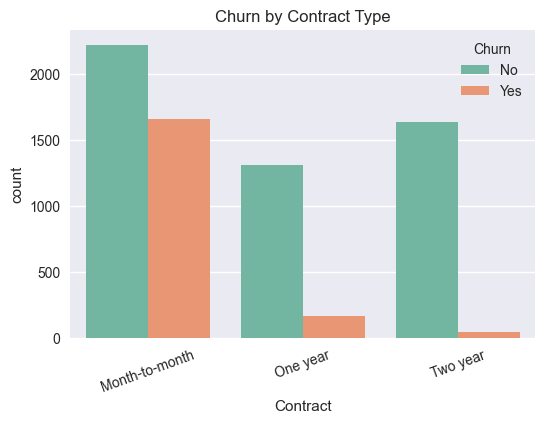

In [129]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()


Month-to-month contracts churn heavily

One & two-year contracts retain better

<h3> Payment Method </h3>

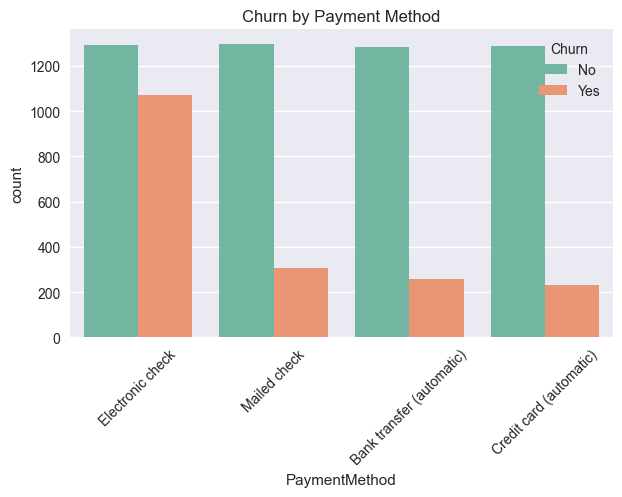

In [130]:
plt.figure(figsize=(7,4))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()


Electronic check users churn more

Auto-payment reduces churn

Indicates friction in payment experience

<h3> Internet Services </h3>

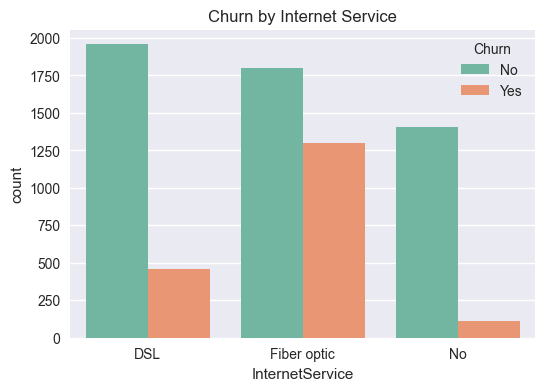

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()


Fiber optic customers churn more

Possibly due to cost vs expectation gap

<h3> Support Services </h3>

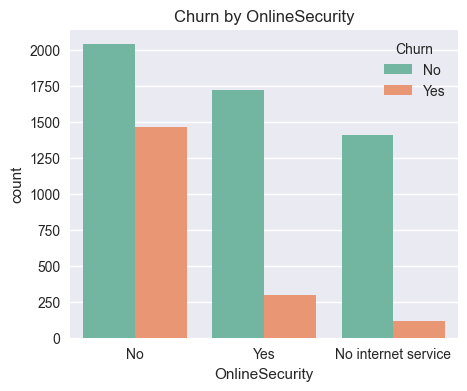

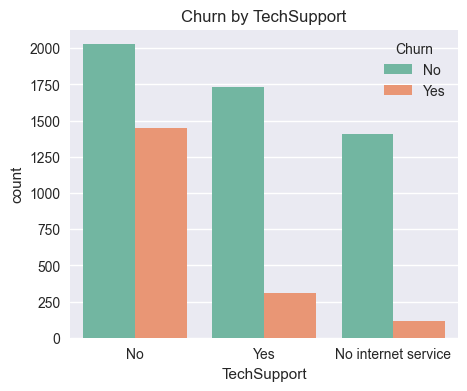

In [132]:
services = ["OnlineSecurity", "TechSupport"]

for col in services:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn by {col}")
    plt.show()

Lack of support services and internet security strongly correlates with churn

Value-added services improve retention

<h2> Correlation Analysis<h/2> 

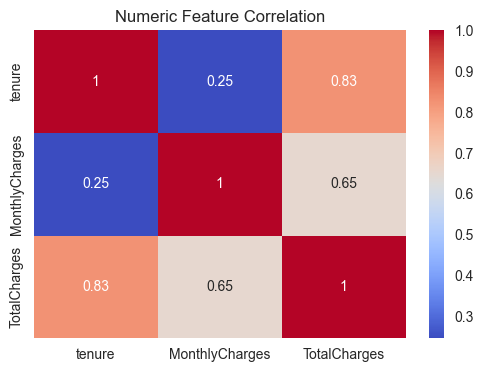

In [133]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Feature Correlation")
plt.show()


Tenure and TotalCharges highly correlated

Need to watch multicollinearity for linear models

<h3>Summary</h3>

Key Findings from EDA

*Customers on month-to-month contracts have the highest churn rates

*Short tenure customers are significantly more likely to churn

*Higher monthly charges are associated with increased churn

*Customers lacking online security and tech support churn more

*Electronic check payments show higher churn compared to automatic payments

In [134]:
df.to_csv("cleaned_telco_churn.csv", index=False)